# 6.6 Sourcing & analyzing time series data

## This script contains the following points:

1. Install the Quandl library and register for a Quandl account

2. Find a data set to work and import it into Jupyter Notebook

3. Make a subset if necessary

4. Create a line chart of the data

5. Decompose the data's components

6. Conduct a Dickey-Fuller test to check for stationarity

7. Conduct a round of differencing on the data if it's not stationary

8. Perform another round of differencing if still not stationary

9. Check the autocorrelations

## 1. Install the Quandl library and register for a Quandl account

In [4]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [5]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

## 2. Find a data set to work and import it into Jupyter Notebook

Note: I use the "Gross Domestic Product" dataset from the Federal Reserve Economic Data, as datasets on Quandl are usually about finance, economy, equity, etc. and it is difficult to find any health or healthcare data there. (Source: https://data.nasdaq.com/data/FRED-federal-reserve-economic-data/documentation)

In [8]:
# Configure API key 

quandl.ApiConfig.api_key = '8sTC89s3bKoB1uB7MmbP'

In [9]:
# Import the Federal Reserve Economic Data "Gross Domestic Product"

gdp = quandl.get('FRED/GDP')

In [10]:
gdp.head()

,Value
Date,
1947-01-01,243.164
1947-04-01,245.968
1947-07-01,249.585
1947-10-01,259.745
1948-01-01,265.742


In [11]:
gdp.shape

(300, 1)

In [12]:
gdp.columns

Index(['Value'], dtype='object')

In [13]:
type(gdp)

pandas.core.frame.DataFrame

## 3. Make a subset if necessary

## 4. Create a line chart of the data

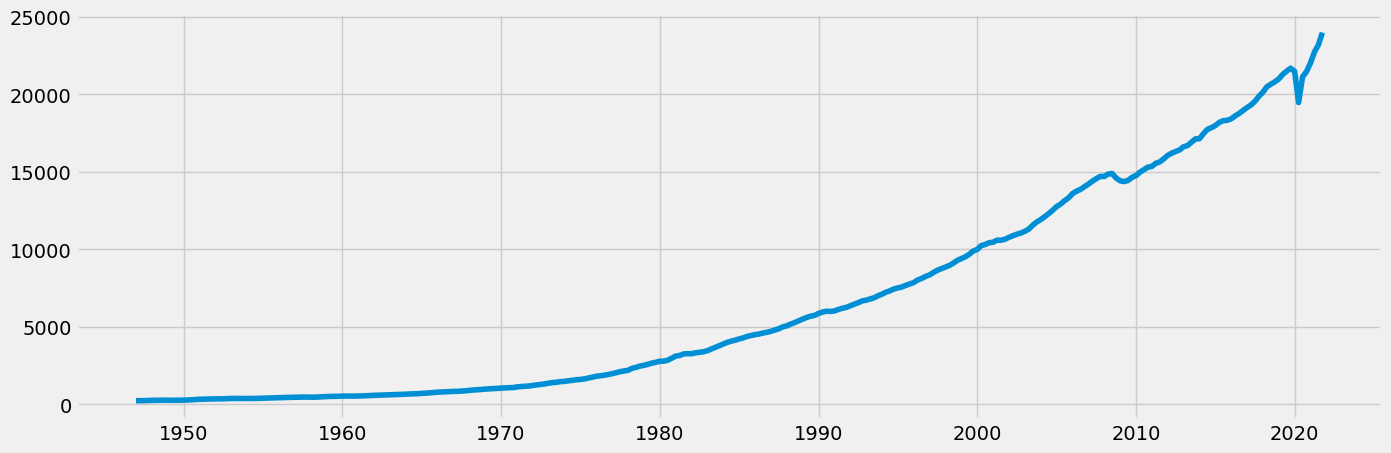

In [16]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(gdp)

## 5. Decompose the data's components

In [26]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(gdp, model='additive')

In [28]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

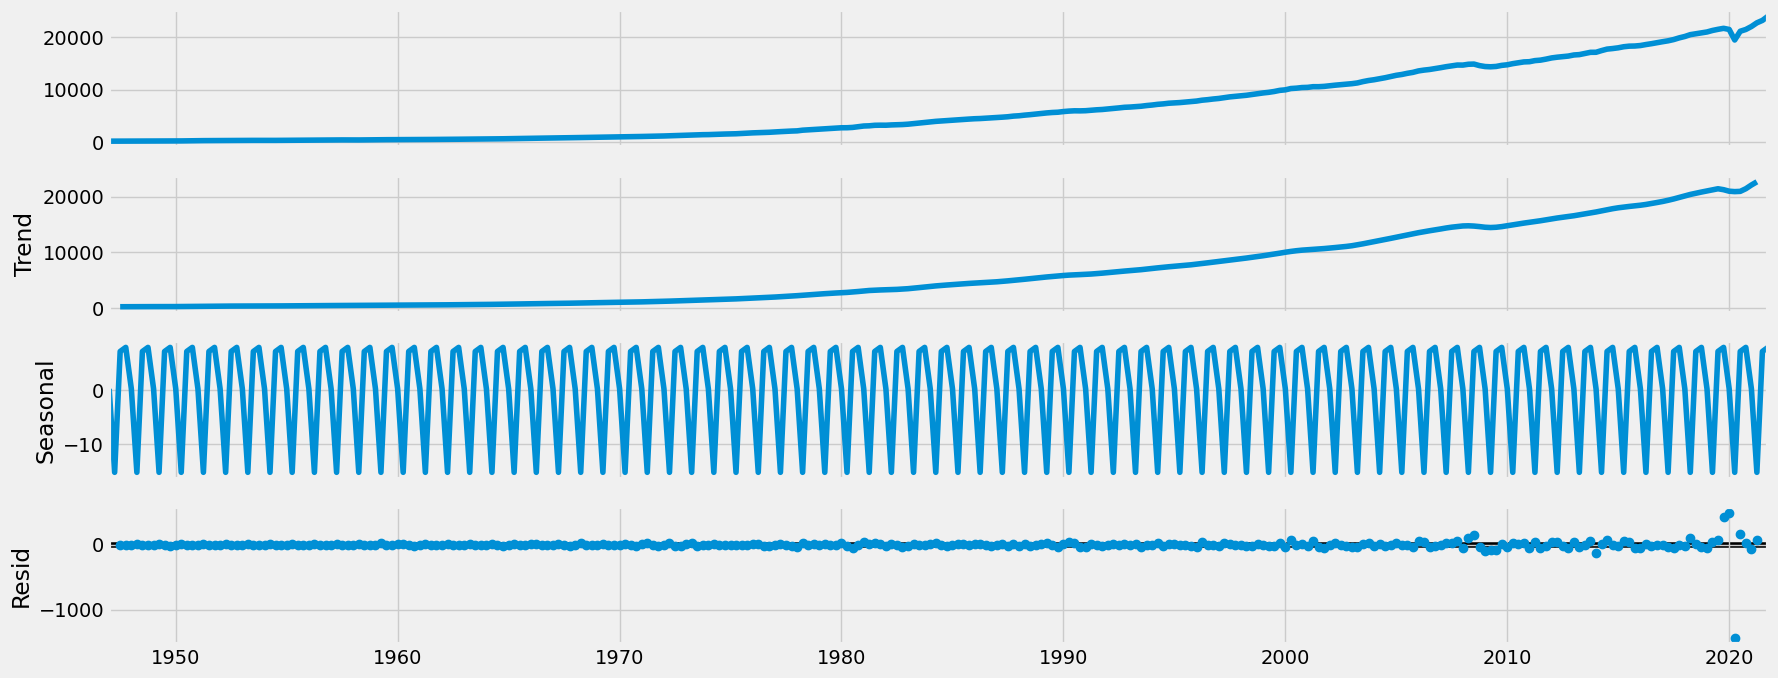

In [30]:
# Plot the separate components

decomposition.plot()
plt.show()

It is seen from plot, especially in level, trend, and residual charts, that the largest fluctuation is around the time of Covid pandemic in 2020s, following with the financial crisis in 2009 as the second largest fluctuation. It is more difficult to see the changes/fluctuations of GDP from the chart of seasonality.

## 6. Conduct a Dickey-Fuller test to check for stationarity

In [37]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(gdp['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                   5.254722
p-value                          1.000000
Number of Lags Used              9.000000
Number of Observations Used    290.000000
Critical Value (1%)             -3.453102
Critical Value (5%)             -2.871559
Critical Value (10%)            -2.572108
dtype: float64


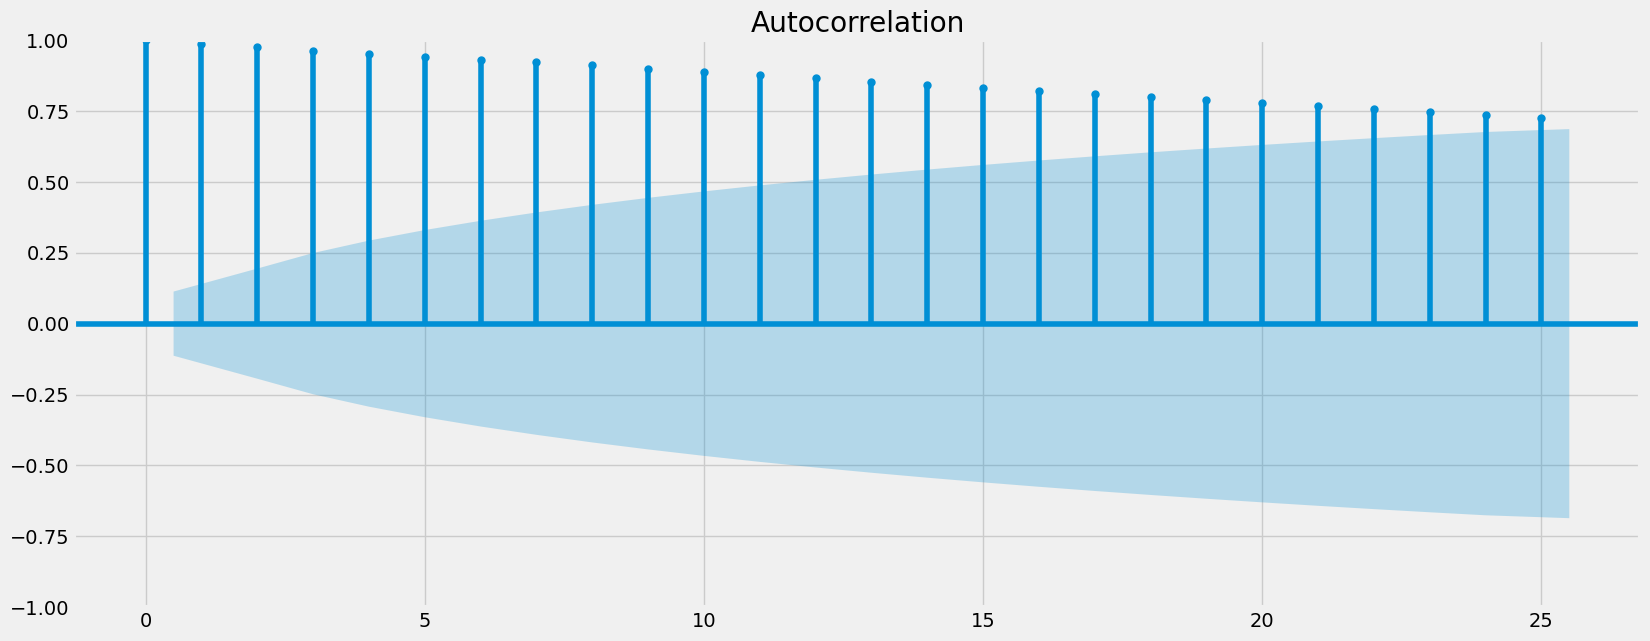

In [56]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(gdp)
plt.show()

- p-value is larger than 0.05: not significant
- Test statistic is larger than critical value: can't reject H0

The data is not stationary.

## 7. Conduct a round of differencing on the data if it's not stationary

In [42]:
gdp_diff = gdp - gdp.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [44]:
gdp_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [46]:
gdp_diff.head()

,Value
Date,
1947-04-01,2.804
1947-07-01,3.617
1947-10-01,10.160
1948-01-01,5.997
1948-04-01,6.825


In [48]:
gdp_diff.columns

Index(['Value'], dtype='object')

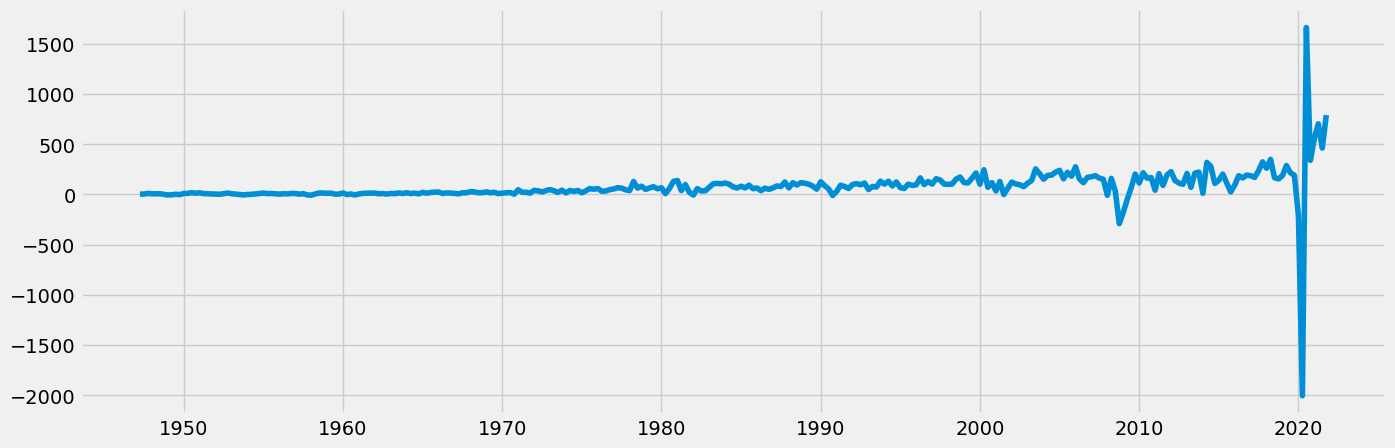

In [50]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(gdp_diff)

In [52]:
dickey_fuller(gdp_diff)

Dickey-Fuller Stationarity test:
Test Statistic                  -1.554274
p-value                          0.506512
Number of Lags Used             11.000000
Number of Observations Used    287.000000
Critical Value (1%)             -3.453342
Critical Value (5%)             -2.871664
Critical Value (10%)            -2.572164
dtype: float64


After differencing, test statistic is still larger than critical value and p-value is still not smaller than 0.05. The data is still not stationary.

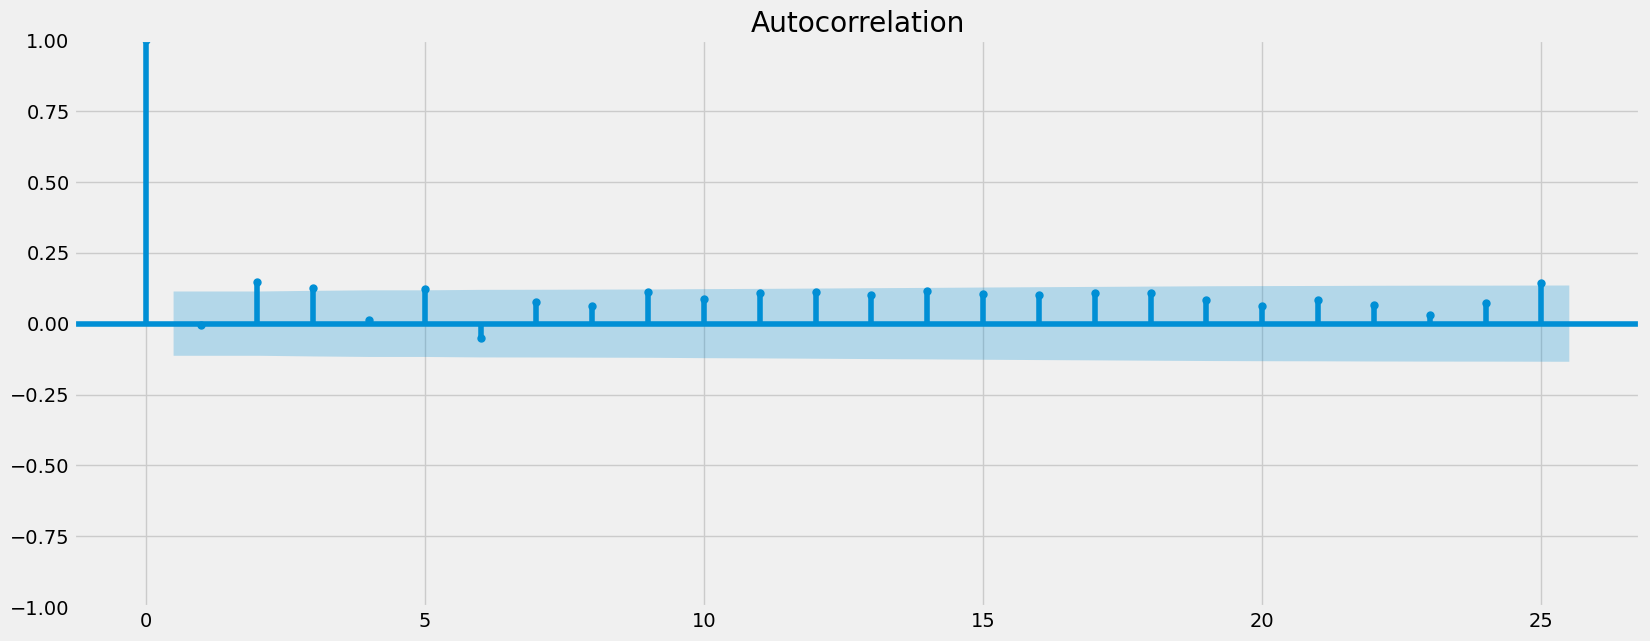

In [58]:
plot_acf(gdp_diff)
plt.show()

## 8. Perform another round of differencing if still not stationary

In [60]:
gdp_diff2 = gdp_diff - gdp_diff.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [62]:
gdp_diff2.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [64]:
gdp_diff2.head()

,Value
Date,
1947-07-01,0.813
1947-10-01,6.543
1948-01-01,-4.163
1948-04-01,0.828
1948-07-01,-0.196


In [66]:
gdp_diff2.columns

Index(['Value'], dtype='object')

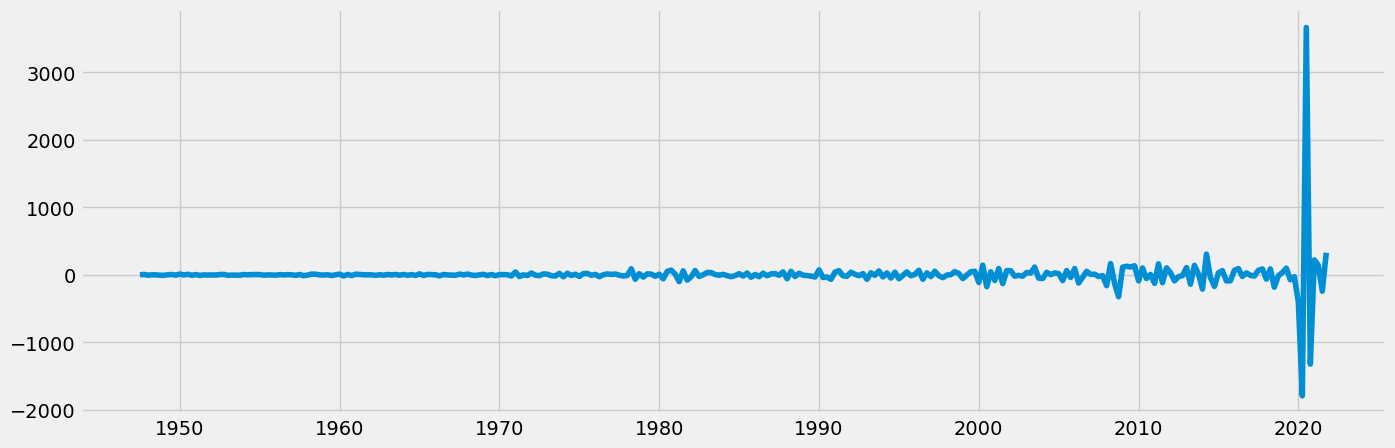

In [68]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(gdp_diff2)

In [70]:
dickey_fuller(gdp_diff2)

Dickey-Fuller Stationarity test:
Test Statistic                -7.613625e+00
p-value                        2.221370e-11
Number of Lags Used            1.600000e+01
Number of Observations Used    2.810000e+02
Critical Value (1%)           -3.453838e+00
Critical Value (5%)           -2.871881e+00
Critical Value (10%)          -2.572280e+00
dtype: float64


This time, p-value is much smaller than 0.05 and test statistic is also smaller than critical value, which means H0 can be rejected. The second round of differencing has successfully stationarized the data.

## 9. Check the autocorrelations

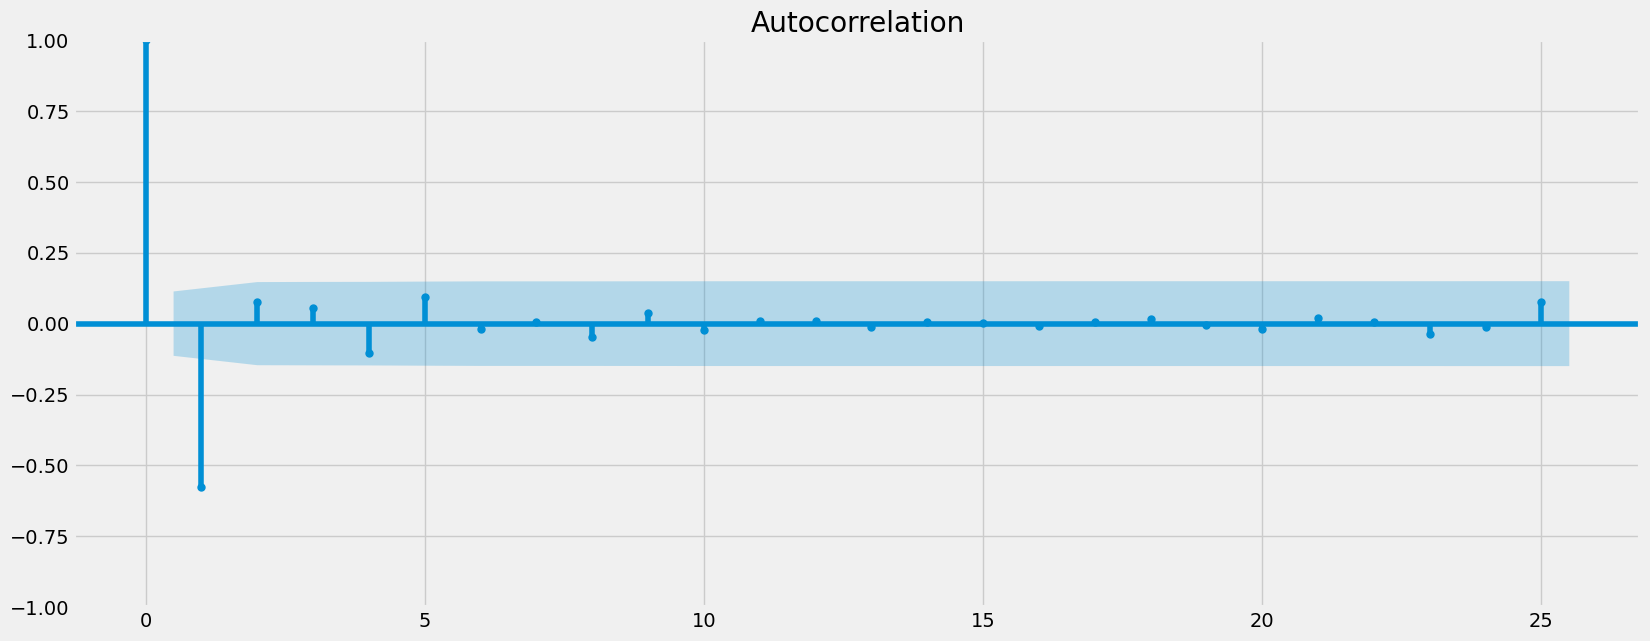

In [79]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(gdp_diff2)
plt.show()